In [1]:
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tensorflow as tf
sess = tf.Session()
seed = 1733715
random.seed(seed)

In [2]:
def franke(x1, x2):
  return (
    .75 * math.exp(-(9 * x1 - 2) ** 2 / 4.0 - (9 * x2 - 2) ** 2 / 4.0) +
    .75 * math.exp(-(9 * x1 + 1) ** 2 / 49.0 - (9 * x2 + 1) / 10.0) +
    .5 * math.exp(-(9 * x1 - 7) ** 2 / 4.0 - (9 * x2 - 3) ** 2 / 4.0) -
    .2 * math.exp(-(9 * x1 - 4) ** 2 - (9 * x2 - 7) ** 2)
  )

In [3]:
x1 = np.array([random.uniform(0,1) for i in range(100)])
x2 = np.array([random.uniform(0,1) for i in range(100)])
y = np.array([franke(x1[i],x2[i]) + random.uniform(-0.1, 0.1) for i in range(100)])

In [4]:
X = pd.DataFrame(data = {'x1':x1, 'x2': x2}).values
X[1]

array([ 0.92664354,  0.56448083])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 1733715)
print("Number of Samples:\n Train Set: %d\n Test Set: %d" %(len(x_train), len(x_test)))

Number of Samples:
 Train Set: 70
 Test Set: 30


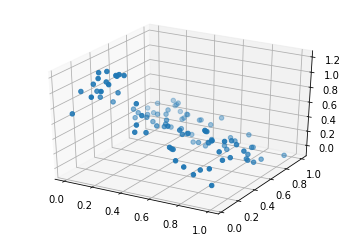

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y)
plt.show()

# Question 1 - Full minimization

In [7]:
# Initialization of hyperparameters
N = 3 # Number of neurons in hidden layer
sigma = 1 # Parameter of hyperbolic tangent (activation function) In tensorflow it is 1
rho = 1 # Learnign rate

In [8]:
# Initialization of model parameters
w = tf.Variable(tf.truncated_normal(shape = [N, 2], seed = seed))
b = tf.Variable(tf.truncated_normal(shape = [N, 1], seed = seed))
v = tf.Variable(tf.truncated_normal(shape = [N, 1], seed = seed))

# Placeholder for input data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

init = tf.global_variables_initializer()
sess.run(init)

hidden_output = tf.tanh(tf.matmul(w, tf.transpose(x)) - b)
#print(sess.run(hidden_output, {x: [[1., 1.]]}))
output = tf.matmul(tf.transpose(v), hidden_output)

y_hat = sess.run(output, {x: X})[0]
y_hat


array([-1.42273474, -1.42507088, -1.19704366, -1.3561579 , -1.4470979 ,
       -1.39259839, -1.61767387, -1.3134414 , -1.54359579, -1.69013464,
       -1.12459064, -1.54254293, -1.67679214, -1.3474443 , -1.23735523,
       -1.56941319, -1.60798693, -1.27070117, -1.64835489, -1.28458738,
       -1.48030913, -1.57544684, -1.5606482 , -1.56597495, -1.12500966,
       -1.54886937, -1.4444685 , -1.66871405, -1.48852897, -1.29261529,
       -1.1742065 , -1.63153565, -1.38795161, -1.38805914, -1.35113573,
       -1.69250047, -1.50741887, -1.65045941, -1.23676538, -1.36801994,
       -1.66144335, -1.6472764 , -1.44264245, -1.10593724, -1.57136703,
       -1.28306305, -1.45433044, -1.56499934, -1.65934229, -1.21947837,
       -1.5308044 , -1.10268438, -1.62495708, -1.49934804, -1.54205775,
       -1.69345856, -1.25465524, -1.60032177, -1.37812555, -1.39587963,
       -1.10128653, -1.67644453, -1.12601089, -1.69722652, -1.59907627,
       -1.55934215, -1.45115316, -1.233886  , -1.42516613, -1.19

In [9]:
#x = tf.truncated_normal(shape = [1,2])
#print(sess.run(x), tf.shape(x))
hidden_output = tf.tanh(tf.matmul(w, tf.transpose(x)))
xp = [1., 1.]
print(sess.run(output, {x: [xp]})) # x and w must be tensors of rank (number of dimensions) 2

[[-1.2300899]]


In [10]:
# checking shapes
a = tf.shape([[1., 1.]])
sess.run(a)

array([1, 2])

We could create a class with the following methods:
- f(x)
- train
 - Hyperparameters as input, too
 - We have to decide the optimization method to use and choose among full-batch, mini-batch and stochastic. I think full-batch is ok with just 70 points
- predict 
- find optimal hyperparameters/ find_fit (N, rho, sigma if we do not want to use the default sigma = 1)
 - This is a method that should receive as input the lists with the values of the hyperparameters that we want to check, and finds the optimal combination based on the value of the training error


In [13]:
import tensorflow as tf

class MLP:
    def __init__(self):
        self.hyperparameters = False
        self.fitted = False
        return
    
    def set_hyperparameters(self, N, rho, sigma = 1):
        self.N = N
        self.rho = rho
        self.sigma = sigma
        
        self.hyperparameters = True
        return
        
    def f(self, X, sigma = 1, w = None, b = None, v = None):
        if (not w) and (not b) and (not v):
            print('Please insert model parameters')
            return
        
        #if len(X.shape) < 2: # Corrects dimension of vectors
         #   X = [X]
        
        # Placeholder for input data
        x = tf.placeholder(tf.float32)
        
        hidden_output = tf.tanh(tf.matmul(w, tf.transpose(x)) - b)
        
        output = tf.matmul(tf.transpose(v), hidden_output)
        
        return (output, {x: X},)[0]
        
    ''' def loss(self, X, y, rho, w, b, v, sigma = 1):
        P = len(X)
        omega = tf.concat(values = [w,b,v], axis = 1)
        
        squared_loss = 1/(2*P)*tf.reduce_sum(tf.squared_difference(self.f(X, sigma, w, b,v), y))
        regularizer = rho*tf.square(tf.norm(omega))
        
        return sess.run(squared_loss + regularizer) 
    '''    
        
    def train(self, x_train, y_train, N = 2, rho = 0.5, sigma = 1, max_iter = 1000, fit = True):
        sess = tf.Session()
        w = tf.Variable(tf.truncated_normal(shape = [N, 2], seed = seed))
        b = tf.Variable(tf.truncated_normal(shape = [N, 1], seed = seed))
        v = tf.Variable(tf.truncated_normal(shape = [N, 1], seed = seed))
        
        x = tf.placeholder(shape = x_train.shape, dtype = tf.float32)
        y = tf.placeholder(tf.float32)
        
        hidden_output = tf.tanh(tf.matmul(w, tf.transpose(x)) - b)
        
        f_out = tf.matmul(tf.transpose(v), hidden_output)
        
        P = len(x_train)
        omega = tf.concat(values = [w,b,v], axis = 1)
        
        squared_loss = 1/(2*P)*tf.reduce_sum(tf.squared_difference(f_out, y))
        regularizer = rho*tf.square(tf.norm(omega))
        
        loss = squared_loss + regularizer
        
        optimizer = tf.train.GradientDescentOptimizer(0.05)
        train = optimizer.minimize(loss)
        
        init = tf.global_variables_initializer()
        sess.run(init)
        
        for i in range(1000):
            sess.run(train, {x: x_train, y: y_train})
            if i %100 == 0:
                # evaluate training accuracy
                curr_W, curr_b, curr_v, curr_loss = sess.run([w, b, v, loss], {x: x_train, y: y_train})
                print("loss: %s"%curr_loss)
        return
        
        
        
        
        
        
        
        
        
        
        if fit:
            self.fitted = True
            # Set hyperparameters
            self.N = N
            self.rho = rho
            self.sigma = sigma
            
            # Set model parameters
            self.w = w
            self.b = b
            self.v = v
            
        if not fit:
            # Returns a dictionary with model parameters values
            return {'w': w,
                    'b': b,
                    'v': v}
    def predict(self, x_new):
        '''To use predict, we must first fit the model'''
        if not self.fitted:
            pass
            
        
        

In [17]:
mlp = MLP()
w = tf.Variable(tf.truncated_normal(shape = [N, 2], seed = seed))
b = tf.Variable(tf.truncated_normal(shape = [N, 1], seed = seed))
v = tf.Variable(tf.truncated_normal(shape = [N, 1], seed = seed))

#y = mlp.f(X = x_train[0], b = b, N = 1, rho = 1, sigma=1, v=v, w=w)
mlp.train(x_train, y_train, N = 5, rho = 1e-5, sigma = 1, max_iter = 100000, fit = True)

loss: 1.34077
loss: 0.115465
loss: 0.0799761
loss: 0.0639138
loss: 0.0518888
loss: 0.0404516
loss: 0.0294878
loss: 0.0205159
loss: 0.0147455
loss: 0.011848


In [103]:
omega = tf.concat([w,b,v], axis = 1)
norma = tf.norm(omega)
print(sess.run(norma))

2.71077


In [101]:
print(sess.run(b))

[[ 0.66057515]
 [ 0.67874563]
 [-1.09876871]]


In [24]:
x = tf.constant([1.,1.], dtype = tf.float32)
y = tf.constant([.5,.5], dtype = tf.float32)
sess.run(tf.reduce_sum(tf.squared_difference(x,y)))

0.5

In [6]:
import tensorflow as tf
N = 5
seed = 1
W = tf.Variable([tf.truncated_normal([N,2], seed=seed)],name="W")
b = tf.Variable([tf.truncated_normal([N,1], seed=seed)],name="b")  
v = tf.Variable([tf.truncated_normal([N,1], seed=seed)],name="v")     


ValueError: Dimension 1 in both shapes must be equal, but are 2 and 1 for 'concat_2' (op: 'ConcatV2') with input shapes: [1,5,1], [1,5,2], [1,5,1], [] and with computed input tensors: input[3] = <0>.